In [263]:
import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
# Packages with tools for text processing.
from wordcloud import WordCloud
import nltk
import nltk.data
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# Packages for getting data ready for and building a LDA model
import gensim
from gensim import corpora, models
from pprint import pprint
from gensim.models.coherencemodel import CoherenceModel
# Cosine similarity and clustering packages.
from sklearn.metrics.pairwise import cosine_similarity
# from scipy.cluster.hierarchy import ward, dendrogram, fcluster
from gensim import matutils
# Network creation and visualization.
import networkx as nx
from pyvis.network import Network

# Other plotting tools.
import pyLDAvis
import pyLDAvis.gensim


In [264]:
import warnings
warnings.filterwarnings('ignore')

In [265]:
# Set working directory.
main_dir = "C:\\Users\\Admin\\Documents\\Programming\\Python Code\\DSF\\NLP"
data_dir = main_dir + "\\project"
plot_dir = main_dir + "/plots"
os.chdir(data_dir)

# Check working directory.
print(os.getcwd())

C:\Users\Admin\Documents\Programming\Python Code\DSF Slides\NLP\project


In [266]:
# Load corpus dataset
article_abstract = pd.read_csv("train.csv", encoding='utf8')
article_abstract.head(10)

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0
5,6,On maximizing the fundamental frequency of the...,Let $\Omega \subset \mathbb{R}^n$ be a bound...,0,0,1,0,0,0
6,7,On the rotation period and shape of the hyperb...,We observed the newly discovered hyperbolic ...,0,1,0,0,0,0
7,8,Adverse effects of polymer coating on heat tra...,The ability of metallic nanoparticles to sup...,0,1,0,0,0,0
8,9,SPH calculations of Mars-scale collisions: the...,We model large-scale ($\approx$2000km) impac...,0,1,0,0,0,0
9,10,$\mathcal{R}_{0}$ fails to predict the outbrea...,Time varying susceptibility of host at indiv...,0,0,0,0,1,0


In [267]:
abstract = article_abstract['ABSTRACT']
print(abstract.head(10))
len(abstract)

0      Predictive models allow subject-specific inf...
1      Rotation invariance and translation invarian...
2      We introduce and develop the notion of spher...
3      The stochastic Landau--Lifshitz--Gilbert (LL...
4      Fourier-transform infra-red (FTIR) spectra o...
5      Let $\Omega \subset \mathbb{R}^n$ be a bound...
6      We observed the newly discovered hyperbolic ...
7      The ability of metallic nanoparticles to sup...
8      We model large-scale ($\approx$2000km) impac...
9      Time varying susceptibility of host at indiv...
Name: ABSTRACT, dtype: object


20972

In [268]:
# Tokenize documents into individial words
abstract_tokenized = [word_tokenize(abstract[i]) for i in range(0,len(abstract))]

# Isolate single document to test cleaning process
abstract_words = abstract_tokenized[0]
print(abstract_words)

['Predictive', 'models', 'allow', 'subject-specific', 'inference', 'when', 'analyzing', 'disease', 'related', 'alterations', 'in', 'neuroimaging', 'data', '.', 'Given', 'a', 'subject', "'s", 'data', ',', 'inference', 'can', 'be', 'made', 'at', 'two', 'levels', ':', 'global', ',', 'i.e', '.', 'identifiying', 'condition', 'presence', 'for', 'the', 'subject', ',', 'and', 'local', ',', 'i.e', '.', 'detecting', 'condition', 'effect', 'on', 'each', 'individual', 'measurement', 'extracted', 'from', 'the', 'subject', "'s", 'data', '.', 'While', 'global', 'inference', 'is', 'widely', 'used', ',', 'local', 'inference', ',', 'which', 'can', 'be', 'used', 'to', 'form', 'subject-specific', 'effect', 'maps', ',', 'is', 'rarely', 'used', 'because', 'existing', 'models', 'often', 'yield', 'noisy', 'detections', 'composed', 'of', 'dispersed', 'isolated', 'islands', '.', 'In', 'this', 'article', ',', 'we', 'propose', 'a', 'reconstruction', 'method', ',', 'named', 'RSM', ',', 'to', 'improve', 'subject-sp

In [269]:
# Convert to lower case.
abstract_words = [word.lower() for word in abstract_words]
print(abstract_words[:10])  


['predictive', 'models', 'allow', 'subject-specific', 'inference', 'when', 'analyzing', 'disease', 'related', 'alterations']


In [270]:
# Get common English stop words.
stop_words = set(stopwords.words('english'))

In [273]:
custom_word_list = ["a","about","above","after","again","against","ain","all","am","an","and","any","are","aren","aren't","as","at","be","because","been","before","being","below","between","both","but","by","can","couldn","couldn't","d","did","didn","didn't","do","does","doesn","doesn't","doing","don","don't","down","during","each","few","for","from","further","had","hadn","hadn't","has","hasn","hasn't","have","haven","haven't","having","he","her","here","hers","herself","him","himself","his","how","i","if","in","into","is","isn","isn't","it","it's","its","itself","just","ll","m","ma","me","mightn","mightn't","more","most","mustn","mustn't","my","myself","needn","needn't","no","nor","not","now","o","of","off","on","once","only","or","other","our","ours","ourselves","out","over","own","re","s","same","shan","shan't","she","she's","should","should've","shouldn","shouldn't","so","some","such","t","than","that","that'll","the","their","theirs","them","themselves","then","there","these","they","this","those","through","to","too","under","until","up","ve","very","was","wasn","wasn't","we","were","weren","weren't","what","when","where","which","while","who","whom","why","will","with","won","won't","wouldn","wouldn't","y","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","could","he'd","he'll","he's","here's","how's","i'd","i'll","i'm","i've","let's","ought","she'd","she'll","that's","there's","they'd","they'll","they're","they've","we'd","we'll","we're","we've","what's","when's","where's","who's","why's","would","able","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","afterwards","ah","almost","alone","along","already","also","although","always","among","amongst","announce","another","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","arent","arise","around","aside","ask","asking","auth","available","away","awfully","b","back","became","become","becomes","becoming","beforehand","begin","beginning","beginnings","begins","behind","believe","beside","besides","beyond","biol","brief","briefly","c","ca","came","cannot","can't","cause","causes","certain","certainly","co","com","come","comes","contain","containing","contains","couldnt","date","different","done","downwards","due","e","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","except","f","far","ff","fifth","first","five","fix","followed","following","follows","former","formerly","forth","found","four","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","happens","hardly","hed","hence","hereafter","hereby","herein","heres","hereupon","hes","hi","hid","hither","home","howbeit","however","hundred","id","ie","im","immediate","immediately","importance","important","inc","indeed","index","information","instead","invention","inward","itd","it'll","j","k","keep","keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","'ll","look","looking","looks","ltd","made","mainly","make","makes","many","may","maybe","mean","means","meantime","meanwhile","merely","mg","might","million","miss","ml","moreover","mostly","mr","mrs","much","mug","must","n","na","name","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next","nine","ninety","nobody","non","none","nonetheless","noone","normally","nos","noted","nothing","nowhere","obtain","obtained","obviously","often","oh","ok","okay","old","omitted","one","ones","onto","ord","others","otherwise","outside","overall","owing","p","page","pages","part","particular","particularly","past","per","perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","ran","rather","rd","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","respectively","resulted","resulting","results","right","run","said","saw","say","saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent","seven","several","shall","shed","shes","show","showed","shown","showns","shows","significant","significantly","similar","similarly","since","six","slightly","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop","strongly","sub","substantially","successfully","sufficiently","suggest","sup","sure","take","taken","taking","tell","tends","th","thank","thanks","thanx","thats","that've","thence","thereafter","thereby","thered","therefore","therein","there'll","thereof","therere","theres","thereto","thereupon","there've","theyd","theyre","think","thou","though","thoughh","thousand","throug","throughout","thru","thus","til","tip","together","took","toward","towards","tried","tries","truly","try","trying","ts","twice","two","u","un","unfortunately","unless","unlike","unlikely","unto","upon","ups","us","use","used","useful","usefully","usefulness","uses","using","usually","v","value","various","'ve","via","viz","vol","vols","vs","w","want","wants","wasnt","way","wed","welcome","went","werent","whatever","what'll","whats","whence","whenever","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","whim","whither","whod","whoever","whole","who'll","whomever","whos","whose","widely","willing","wish","within","without","wont","words","world","wouldnt","www","x","yes","yet","youd","youre","z","zero","a's","ain't","allow","allows","apart","appear","appreciate","appropriate","associated","best","better","c'mon","c's","cant","changes","clearly","concerning","consequently","consider","considering","corresponding","course","currently","definitely","described","despite","entirely","exactly","example","going","greetings","hello","help","hopefully","ignored","inasmuch","indicate","indicated","indicates","inner","insofar","it'd","keep","keeps","novel","presumably","reasonably","second","secondly","sensible","serious","seriously","sure","t's","third","thorough","thoroughly","three","well","wonder"]

In [274]:
# Add additional words to stop words list.

for word in custom_word_list:
                if (word not in stop_words):
                    stop_words.add(word)
                else:
                        continue


In [275]:
print(stop_words)

{'mrs', 'example', 'under', "that've", 'presumably', 'entirely', 'else', 'alone', 'oh', 'ups', 'himself', 'whether', 'indicates', 'should', 'information', 'indeed', "it'd", 'might', 'plus', 'against', 'keeps', 'giving', 'whither', 'exactly', 'rd', 'reasonably', 'suggest', 'hed', 'self', 'former', 'thanks', 'wish', 't', 'pages', 'seen', 'therefore', 'theyd', 'v', 'edu', 'off', "it's", 'noted', 'y', 'im', 'whos', 'hereupon', "weren't", 'had', 'line', 'nos', 'having', "that'll", 'am', 'ed', 'well', 'if', 'do', 'cause', 'makes', 'thus', "you've", 'u', 'did', 'apart', 'na', 'twice', 'three', 'whose', 'once', 'herein', 'kg', 'arise', 'vs', 'some', 'contain', 'mustn', 'resulted', 'enough', 'wants', 'put', 'before', 'many', 'previously', "what'll", 'will', 'unfortunately', 'yourselves', 'most', 'thousand', 'various', 'accordance', 'itd', 'more', 'whatever', "can't", 'present', 'any', 'elsewhere', 'serious', 'shows', 'seem', 'j', 'often', 'only', 'cant', 'wont', "i'm", 'ca', 'anything', 'believ

In [276]:
# Remove stop words from text.
abstract_words = [word for word in abstract_words if not word in stop_words]
print(abstract_words[:10])

['predictive', 'models', 'subject-specific', 'inference', 'analyzing', 'disease', 'alterations', 'neuroimaging', 'data', '.']


In [277]:
# Remove punctuation and any non-alphabetical characters.
abstract_words = [word for word in abstract_words if word.isalpha()]
print(abstract_words[:10])

['predictive', 'models', 'inference', 'analyzing', 'disease', 'alterations', 'neuroimaging', 'data', 'subject', 'data']


In [278]:
# Stem words.
abstract_words = [PorterStemmer().stem(word) for word in abstract_words]
print(abstract_words[:10])

['predict', 'model', 'infer', 'analyz', 'diseas', 'alter', 'neuroimag', 'data', 'subject', 'data']


In [279]:
# Create a list for clean documents.
abstract_clean = [None] * len(abstract_tokenized)
# Create a list of word counts for each clean document.
word_counts_per_abstract = [None] * len(abstract_tokenized)

# Process words in all documents.
for i in range(len(abstract_tokenized)):
# 1. Convert to lower case.
    abstract_clean[i] = [document.lower() for document in abstract_tokenized[i]]

# 2. Remove stopwords.
    abstract_clean[i] = [word for word in abstract_clean[i] if not word in stop_words]

# 3. Remove punctuation and any non-alphabetical characters.
    abstract_clean[i] = [word for word in abstract_clean[i] if word.isalpha()]

# 4. Stem words.
    abstract_clean[i] = [PorterStemmer().stem(word) for word in abstract_clean[i]]

# Record the word count per document.
    word_counts_per_abstract[i] = len(abstract_clean[i])
    



In [280]:
len(abstract_clean)

20972

Text(0, 0.5, 'Frequency')

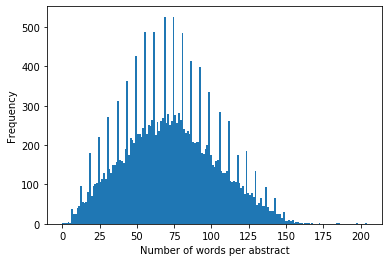

In [281]:
plt.hist(word_counts_per_abstract, bins = len(set(word_counts_per_abstract)))
plt.xlabel('Number of words per abstract')
plt.ylabel('Frequency')

#This shows how many words per abstract

In [282]:
# Convert word counts list and document list to numpy arrays.
word_counts_array = np.array(word_counts_per_abstract)
abstract_array = np.array(abstract_clean)
print(len(abstract_array))

20972


In [283]:
project_abstract_list = [' '.join(document) for document in abstract_clean]
print(project_abstract_list[0])
print(len(project_abstract_list))

predict model infer analyz diseas alter neuroimag data subject data infer level global identifiy condit presenc subject local detect condit individu measur extract subject data global infer local infer form map rare exist model yield noisi detect compos dispers isol island articl propos reconstruct method name rsm improv detect predict model approach binari classifi rsm aim reduc nois sampl error finit sampl exampl train classifi propos method algorithm binari classifi diagnost manner condit presenc reconstruct pose problem prior model paramet estim train data fashion experiment evalu perform synthet gener data data alzheim diseas neuroimag initi adni databas synthet data demonstr rsm yield higher detect accuraci compar model directli bootstrap averag analys adni dataset rsm improv correl detect cortic thick data marker alzheim diseas ad mini mental state examin score cerebrospin fluid level reliabl studi longitudin adni dataset improv detect reliabl rsm
20972


In [284]:
# Save output file name to a variable.
out_filename = data_dir + "/clean_abstract.txt"

# Create a function that takes a list of character strings
# and a name of an output file and writes it into a txt file.
def write_lines(lines, filename):   #<- given lines to write and filename
    joined_lines = '\n'.join(lines) #<- join lines with line breaks
    file = open(out_filename, 'w', encoding="utf-8")  #<- open write only file
    file.write(joined_lines)        #<- write lines to file
    file.close()                    #<- close connection

# Write sequences to file.
write_lines(project_abstract_list, out_filename)


In [307]:
# Initialize `CountVectorizer`.
vec = CountVectorizer()

# Transform the list of documents into DTM.
X = vec.fit_transform(project_abstract_list)
print(X.toarray()) #<- show output as a matrix

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [286]:
# Convert the matrix into a pandas dataframe for easier manipulation.
DTM = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
print(DTM.shape)
print(DTM.head(10))

(20972, 31100)
   aa  aaa  aaai  aact  aad  aae  aah  aak  aakn  aal  ...  überblick  ülger  \
0   0    0     0     0    0    0    0    0     0    0  ...          0      0   
1   0    0     0     0    0    0    0    0     0    0  ...          0      0   
2   0    0     0     0    0    0    0    0     0    0  ...          0      0   
3   0    0     0     0    0    0    0    0     0    0  ...          0      0   
4   0    0     0     0    0    0    0    0     0    0  ...          0      0   
5   0    0     0     0    0    0    0    0     0    0  ...          0      0   
6   0    0     0     0    0    0    0    0     0    0  ...          0      0   
7   0    0     0     0    0    0    0    0     0    0  ...          0      0   
8   0    0     0     0    0    0    0    0     0    0  ...          0      0   
9   0    0     0     0    0    0    0    0     0    0  ...          0      0   

   čadek  čebyšev  čech  černý  šidák  šumenjak  šverák  šámal  
0      0        0     0      0      0  

In [287]:
# Function that sorts and looks at first n-entries in the dictionary.
def HeadDict(dict_x, n):
    # Get items from the dictionary and sort them by
    # value key in descending (i.e. reverse) order
    sorted_x = sorted(dict_x.items(),
                reverse = True,
                key = lambda kv: kv[1])

    # Convert sorted dictionary to a list.
    dict_x_list = list(sorted_x)

    # Return the first `n` values from the dictionary only.
    return(dict(dict_x_list[:n]))

In [288]:
# Sum frequencies of each word in all documents.
DTM.sum(axis = 0).head()

# Save series as a dictionary.
corpus_freq_dist = DTM.sum(axis = 0).to_dict()

# Look at the frequencies.
print(HeadDict(corpus_freq_dist, 10))

{'model': 17759, 'method': 11255, 'data': 10627, 'network': 9588, 'gener': 9580, 'system': 9171, 'propos': 9136, 'problem': 9051, 'algorithm': 8343, 'learn': 7840}


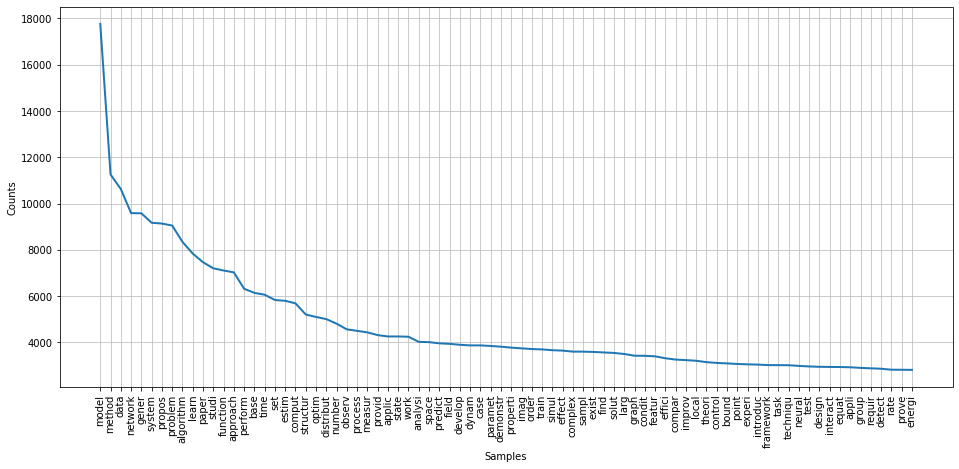

In [289]:
# Save as a FreqDist object native to nltk.
corpus_freq_dist = nltk.FreqDist(corpus_freq_dist)
# Plot distribution for the entire corpus.
plt.figure(figsize = (16, 7))
corpus_freq_dist.plot(80)

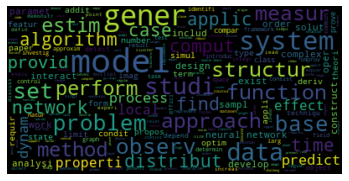

In [308]:
# Construct a word cloud from corpus.
wordcloud = WordCloud(max_font_size = 40, background_color = "black")
wordcloud = wordcloud.generate(' '.join(project_abstract_list))

# Plot the cloud using matplotlib.
plt.figure()
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [291]:
pickle.dump(DTM, open('DTM.sav', 'wb'), protocol=4)
pickle.dump(X, open('DTM_matrix.sav', 'wb'))
pickle.dump(abstract_clean, open('abstract_clean.sav', 'wb'))
pickle.dump(project_abstract_list, open('project_abstract_list.sav', 'wb'))
pickle.dump(word_counts_array, open('word_counts_array.sav', 'wb'))

In [292]:
processed_docs = pickle.load(open("abstract_clean.sav","rb"))  #<- the processed abstracts

In [293]:
# Set the seed.
np.random.seed(1)

dictionary = gensim.corpora.Dictionary(processed_docs)

# Iterate through the first 10 items of the dictionary and prints out the key and value.
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 50:
        break

0 accuraci
1 ad
2 adni
3 aim
4 algorithm
5 alter
6 alzheim
7 analys
8 analyz
9 approach
10 articl
11 averag
12 binari
13 bootstrap
14 cerebrospin
15 classifi
16 compar
17 compos
18 condit
19 correl
20 cortic
21 data
22 databas
23 dataset
24 demonstr
25 detect
26 diagnost
27 directli
28 diseas
29 dispers
30 error
31 estim
32 evalu
33 examin
34 exampl
35 exist
36 experiment
37 extract
38 fashion
39 finit
40 fluid
41 form
42 gener
43 global
44 higher
45 identifiy
46 improv
47 individu
48 infer
49 initi
50 island


In [294]:
# Use list comprehension to transform each doc within our processed_docs object.
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# look at the 1st document.
print(bow_corpus[0])

[(0, 1), (1, 1), (2, 3), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 3), (16, 1), (17, 1), (18, 3), (19, 1), (20, 1), (21, 8), (22, 1), (23, 2), (24, 1), (25, 6), (26, 1), (27, 1), (28, 3), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 2), (44, 1), (45, 1), (46, 3), (47, 1), (48, 4), (49, 1), (50, 1), (51, 1), (52, 2), (53, 2), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 2), (61, 1), (62, 5), (63, 1), (64, 2), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 2), (71, 2), (72, 1), (73, 1), (74, 2), (75, 1), (76, 2), (77, 1), (78, 2), (79, 5), (80, 2), (81, 1), (82, 1), (83, 1), (84, 3), (85, 2), (86, 1), (87, 2), (88, 2)]


In [295]:
# Isolate the first document.
bow_doc_1 = bow_corpus[5]

# Iterate through each dictionary item using the index.
# Print out each actual word and how many times it appears.
for i in range(len(bow_doc_1)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_1[i][0],

        dictionary[bow_doc_1[i][0]],
        bow_doc_1[i][1]))


Word 18 ("condit") appears 1 time.
Word 82 ("state") appears 1 time.
Word 116 ("ball") appears 1 time.
Word 137 ("term") appears 2 time.
Word 150 ("domain") appears 2 time.
Word 151 ("equat") appears 2 time.
Word 167 ("prove") appears 1 time.
Word 217 ("arbitrari") appears 1 time.
Word 218 ("asymmetri") appears 1 time.
Word 219 ("behaviour") appears 1 time.
Word 220 ("bound") appears 3 time.
Word 221 ("close") appears 1 time.
Word 222 ("convex") appears 1 time.
Word 223 ("corollari") appears 1 time.
Word 224 ("direct") appears 1 time.
Word 225 ("dirichlet") appears 2 time.
Word 226 ("discuss") appears 1 time.
Word 227 ("distanc") appears 1 time.
Word 228 ("distribut") appears 1 time.
Word 229 ("eigenvalu") appears 1 time.
Word 230 ("final") appears 1 time.
Word 231 ("ground") appears 1 time.
Word 232 ("inscrib") appears 1 time.
Word 233 ("interest") appears 1 time.
Word 234 ("larg") appears 2 time.
Word 235 ("maxim") appears 2 time.
Word 236 ("maximum") appears 3 time.
Word 237 ("obser

In [296]:
# Initialize TF-IDF
tfidf = models.TfidfModel(bow_corpus)

# Apply to the entire corpus.
corpus_tfidf = tfidf[bow_corpus]

# Preview TF-IDF scores for the first document.
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.0370511552471141),
 (1, 0.05999644673054847),
 (2, 0.32847279925881456),
 (3, 0.041816842873722386),
 (4, 0.022886687487391765),
 (5, 0.07097075004111343),
 (6, 0.18205391610076596),
 (7, 0.04970195813963572),
 (8, 0.036317306253615525),
 (9, 0.02078073435509122),
 (10, 0.046999943748216054),
 (11, 0.04452308962149893),
 (12, 0.10188309300926775),
 (13, 0.07017596775319403),
 (14, 0.12662592559050365),
 (15, 0.1343889372294439),
 (16, 0.027482619098820923),
 (17, 0.061666538237917026),
 (18, 0.0893092681983706),
 (19, 0.04131297588674486),
 (20, 0.09154316123754298),
 (21, 0.15426747075195787),
 (22, 0.05898655933929329),
 (23, 0.06721442181089768),
 (24, 0.024805271550921937),
 (25, 0.21091636486500182),
 (26, 0.07085434286167659),
 (27, 0.04675891969607283),
 (28, 0.18644587130852847),
 (29, 0.059281774274626005),
 (30, 0.03829031793136202),
 (31, 0.02749235069725717),
 (32, 0.03272304136551318),
 (33, 0.050077400586423355),
 (34, 0.04012285506581182),
 (35, 0.0269063775428981

In [297]:
# LDA (Latent Dirichlet allocation) model
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics = 5, id2word = dictionary, workers = 4, passes = 25)
print(lda_model_tfidf)


LdaModel(num_terms=31114, num_topics=5, decay=0.5, chunksize=2000)


In [298]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.006*"group" + 0.005*"algebra" + 0.005*"prove" + 0.004*"space" + 0.004*"equat" + 0.004*"finit" + 0.003*"function" + 0.003*"theorem" + 0.003*"bound" + 0.003*"solut"
Topic: 1 Word: 0.004*"network" + 0.004*"model" + 0.004*"learn" + 0.004*"algorithm" + 0.004*"data" + 0.004*"method" + 0.003*"problem" + 0.003*"propos" + 0.003*"estim" + 0.003*"optim"
Topic: 2 Word: 0.001*"connectom" + 0.001*"parser" + 0.001*"memristor" + 0.001*"dialect" + 0.001*"cop" + 0.001*"dct" + 0.001*"metamodel" + 0.001*"lm" + 0.001*"multipartit" + 0.001*"teleoper"
Topic: 3 Word: 0.005*"magnet" + 0.004*"phase" + 0.004*"quantum" + 0.004*"electron" + 0.004*"state" + 0.003*"temperatur" + 0.003*"spin" + 0.003*"energi" + 0.003*"field" + 0.003*"interact"
Topic: 4 Word: 0.005*"galaxi" + 0.005*"star" + 0.004*"mass" + 0.003*"planet" + 0.003*"observ" + 0.003*"dark" + 0.002*"gravit" + 0.002*"stellar" + 0.002*"emiss" + 0.002*"atmospher"


In [299]:
print(processed_docs[0])
for index, score in sorted(lda_model_tfidf[bow_corpus[0]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))

['predict', 'model', 'infer', 'analyz', 'diseas', 'alter', 'neuroimag', 'data', 'subject', 'data', 'infer', 'level', 'global', 'identifiy', 'condit', 'presenc', 'subject', 'local', 'detect', 'condit', 'individu', 'measur', 'extract', 'subject', 'data', 'global', 'infer', 'local', 'infer', 'form', 'map', 'rare', 'exist', 'model', 'yield', 'noisi', 'detect', 'compos', 'dispers', 'isol', 'island', 'articl', 'propos', 'reconstruct', 'method', 'name', 'rsm', 'improv', 'detect', 'predict', 'model', 'approach', 'binari', 'classifi', 'rsm', 'aim', 'reduc', 'nois', 'sampl', 'error', 'finit', 'sampl', 'exampl', 'train', 'classifi', 'propos', 'method', 'algorithm', 'binari', 'classifi', 'diagnost', 'manner', 'condit', 'presenc', 'reconstruct', 'pose', 'problem', 'prior', 'model', 'paramet', 'estim', 'train', 'data', 'fashion', 'experiment', 'evalu', 'perform', 'synthet', 'gener', 'data', 'data', 'alzheim', 'diseas', 'neuroimag', 'initi', 'adni', 'databas', 'synthet', 'data', 'demonstr', 'rsm', 'y

In [300]:
# Compute Coherence Score using c_v.
coherence_model_lda = CoherenceModel(model = lda_model_tfidf, texts = processed_docs, dictionary = dictionary, coherence = 'c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.6328701250679991


In [301]:
def compute_coherence_values(dictionary, corpus, texts, limit, start = 2, step = 3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus = corpus, id2word = dictionary, num_topics = num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model = model, texts = texts, dictionary = dictionary, coherence = 'c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


In [302]:
model_list, coherence_values = compute_coherence_values(dictionary = dictionary, corpus = bow_corpus, texts = processed_docs, start = 2, limit = 40, step = 6)
print("Done")


Done


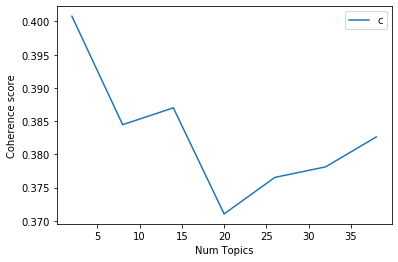

In [303]:
import matplotlib.pyplot as plt
limit = 40; start = 2; step = 6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc = 'best')
plt.show()

In [304]:
pickle.dump(dictionary, open('dictionary.sav', 'wb')) 
pickle.dump(bow_corpus, open('bow_corpus.sav', 'wb')) 
pickle.dump(corpus_tfidf, open('corpus_tfidf.sav', 'wb')) 
pickle.dump(lda_model_tfidf, open('lda_model_tfidf.sav', 'wb'))

In [305]:
# Load pickled data and models.
dictionary = pickle.load(open("dictionary.sav","rb"))
corpus_tfidf = pickle.load(open("corpus_tfidf.sav","rb"))
lda_model_tfidf =  pickle.load(open("lda_model_tfidf.sav","rb"))
DTM = pickle.load(open("DTM.sav","rb"))

# Load pre-saved word counts array 
word_counts_array = pickle.load(open("word_counts_array.sav","rb"))


In [306]:
# Prepare LDA vis object by providing:
vis = pyLDAvis.gensim.prepare(lda_model_tfidf, #<- model object
                              corpus_tfidf, #<- corpus object
                              dictionary) #<- dictionary object

pyLDAvis.display(vis)